# Installaiing Libraries

In [103]:
pip install -q pandas openpyxl

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# DATA First look

In [87]:
import pandas as pd
df = pd.read_excel("10_coin_Bitcoin.xlsx")
print(df)

       SNo     Name Symbol                Date          High           Low  \
0        1  Bitcoin    BTC 2013-04-29 23:59:59    147.488007    134.000000   
1        2  Bitcoin    BTC 2013-04-30 23:59:59    146.929993    134.050003   
2        3  Bitcoin    BTC 2013-05-01 23:59:59    139.889999    107.720001   
3        4  Bitcoin    BTC 2013-05-02 23:59:59    125.599998     92.281898   
4        5  Bitcoin    BTC 2013-05-03 23:59:59    108.127998     79.099998   
...    ...      ...    ...                 ...           ...           ...   
2986  2987  Bitcoin    BTC 2021-07-02 23:59:59  33939.588699  32770.680780   
2987  2988  Bitcoin    BTC 2021-07-03 23:59:59  34909.259899  33402.696536   
2988  2989  Bitcoin    BTC 2021-07-04 23:59:59  35937.567147  34396.477458   
2989  2990  Bitcoin    BTC 2021-07-05 23:59:59  35284.344430  33213.661034   
2990  2991  Bitcoin    BTC 2021-07-06 23:59:59  35038.536363  33599.916169   

              Open         Close        Volume     Marketcap  


In [88]:
print(df.columns)
print(df.shape)

Index(['SNo', 'Name', 'Symbol', 'Date', 'High', 'Low', 'Open', 'Close',
       'Volume', 'Marketcap'],
      dtype='object')
(2991, 10)


In [89]:
print(df.head())

   SNo     Name Symbol                Date        High         Low  \
0    1  Bitcoin    BTC 2013-04-29 23:59:59  147.488007  134.000000   
1    2  Bitcoin    BTC 2013-04-30 23:59:59  146.929993  134.050003   
2    3  Bitcoin    BTC 2013-05-01 23:59:59  139.889999  107.720001   
3    4  Bitcoin    BTC 2013-05-02 23:59:59  125.599998   92.281898   
4    5  Bitcoin    BTC 2013-05-03 23:59:59  108.127998   79.099998   

         Open       Close  Volume     Marketcap  
0  134.444000  144.539993     0.0  1.603769e+09  
1  144.000000  139.000000     0.0  1.542813e+09  
2  139.000000  116.989998     0.0  1.298955e+09  
3  116.379997  105.209999     0.0  1.168517e+09  
4  106.250000   97.750000     0.0  1.085995e+09  


# Linear Regression Using SkLearn

In [83]:
print(df["Name"].unique()) # This tells us that the data is of only Bitcoin

['Bitcoin']


In [91]:
data1 = df
data1 = df.drop(columns=['Name','Symbol','SNo'])

In [92]:
data1['target'] = (data1['Low'] + data['High']) / 2
data1 = data1.drop(columns=['Open', 'Close'])

In [93]:
data1['Date'] = pd.to_datetime(data1['Date'])
data1['Date'] = data1['Date'].astype(np.int64) // 10**9  # Convert to seconds since epoch

In [94]:
X = data1.drop(columns=['target'])
y = data1['target']

In [95]:
# Split data into training and testing sets (70-30 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [96]:
# Actual mode training
model1 = LinearRegression()
model1.fit(X_train, y_train)

LinearRegression()

In [97]:
# Making predictions
y_pred_train = model1.predict(X_train)
y_pred_test = model1.predict(X_test)

In [98]:
# Calculate Errors
mae1 = mean_absolute_error(y_test, y_pred_test)
mse1 = mean_squared_error(y_test, y_pred_test)

print("Mean Absolute Error (MAE):", mae1)
print("Mean Squared Error (MSE):", mse1)

Mean Absolute Error (MAE): 676.0546998332445
Mean Squared Error (MSE): 514483.26894052105


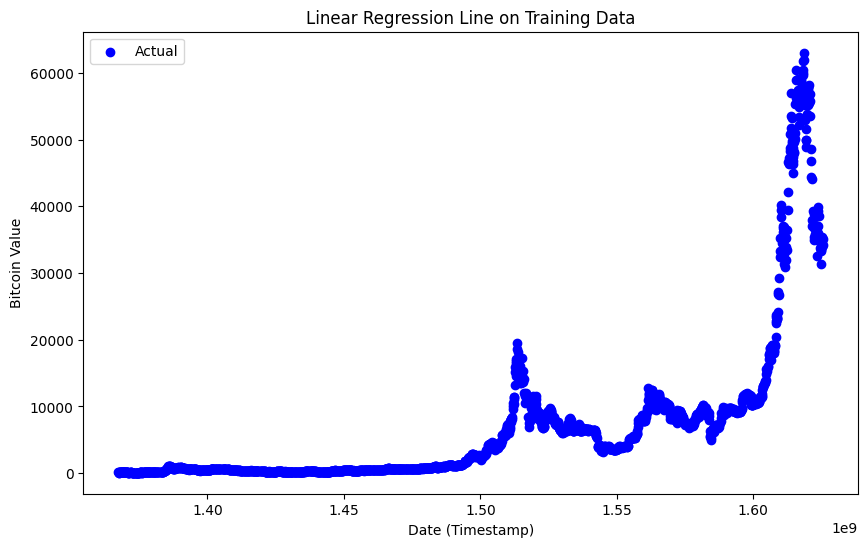

In [99]:
plt.figure(figsize=(10, 6))
plt.scatter(X_train['Date'], y_train, color='blue', label='Actual')
# plt.plot(X_train['Date'], y_pred_train, color='red', label='Predicted')
plt.xlabel('Date (Timestamp)')
plt.ylabel('Bitcoin Value')
plt.title('Linear Regression Line on Training Data')
plt.legend()
plt.show()

In [101]:
# future_dates = pd.date_range(start=pd.to_datetime(X['Date'].max(), unit='s'), periods=61).astype(np.int64) // 10**9
# future_features = pd.DataFrame({'Date': future_dates})
# print(future_features)
# future_pred = model.predict(future_features)




# ================================ Please read this ==========================================================
# Future values can't be predicted based on only one column sinec the model is trained on multiple columns

# Linear Regression from scratch

In [105]:
class LinearRegressionScratch:
    def __init__(self):
        self.weights = None  # Coefficients
        self.bias = None     # Intercept

    def fit(self, X, y):
        """
        Train the Linear Regression model using the normal equation.
        Args:
        - X: Features (2D array or matrix)
        - y: Target variable (1D array or vector)
        """
        # Add a column of ones to X for the bias term
        X = np.c_[np.ones(X.shape[0]), X]  # Shape (n_samples, n_features + 1)

        # Compute weights using the normal equation: (X^T X)^(-1) X^T y
        X_transpose = X.T
        params = np.linalg.inv(X_transpose @ X) @ X_transpose @ y

        # Separate weights and bias
        self.bias = params[0]        # First parameter is the bias
        self.weights = params[1:]    # Remaining are the feature weights

    def predict(self, X):
        """
        Predict target values using the trained model.
        Args:
        - X: Features (2D array or matrix)
        Returns:
        - Predicted values (1D array)
        """
        return self.bias + X @ self.weights

    def mean_squared_error(self, y_true, y_pred):
        """
        Compute Mean Squared Error (MSE).
        Args:
        - y_true: True target values
        - y_pred: Predicted target values
        Returns:
        - MSE (float)
        """
        return np.mean((y_true - y_pred) ** 2)

    def mean_absolute_error(self, y_true, y_pred):
        """
        Compute Mean Absolute Error (MAE).
        Args:
        - y_true: True target values
        - y_pred: Predicted target values
        Returns:
        - MAE (float)
        """
        return np.mean(np.abs(y_true - y_pred))


In [106]:
data2 = df

In [107]:
data2['Target'] = (data2['High'] + data2['Low']) / 2

In [111]:
data2 = data2.drop(columns=['Open', 'Close', 'SNo', 'Name', 'Symbol'])

In [112]:
print(data2.columns)

Index(['Date', 'High', 'Low', 'Volume', 'Marketcap', 'Target'], dtype='object')


In [113]:
data2['Date'] = pd.to_datetime(data2['Date']).astype(int) // 10**9

In [114]:
X = data2.drop(columns=['Target']).values
y = data2['Target'].values

In [115]:
split_index = int(0.7 * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

In [116]:
model2 = LinearRegressionScratch()
model2.fit(X_train, y_train)

In [117]:
y_pred_train = model2.predict(X_train)
y_pred_test = model2.predict(X_test)

In [126]:
mse2 = model2.mean_squared_error(y_test, y_pred_test)
mae2 = model2.mean_absolute_error(y_test, y_pred_test)

In [127]:
print(f"Mean Squared Error  : {mse2}")
print(f"Mean Absolute Error : {mae2}")

Mean Squared Error  : 3.505062963893135e-17
Mean Absolute Error : 3.3186337459321136e-09


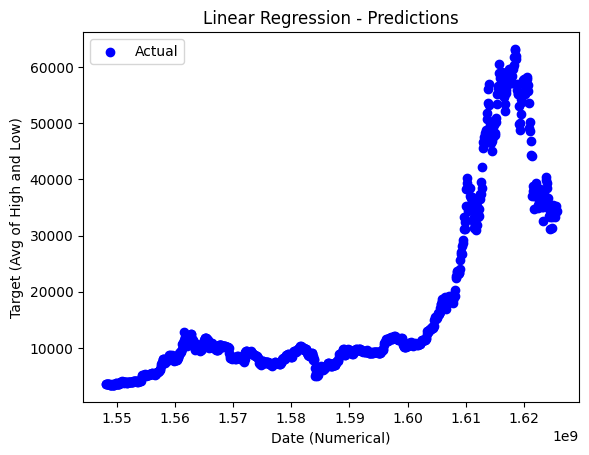

In [124]:
plt.scatter(X_test[:, 0], y_test, color="blue", label="Actual")
plt.xlabel("Date (Numerical)")
plt.ylabel("Target (Avg of High and Low)")
plt.legend()
plt.title("Linear Regression - Predictions")
plt.show()

# Comparison of MAE and MSE

In [130]:
print('='*40)
print("Errors for Model using Sklearn")
print("Mean Absolute Error (MAE):", mae1)
print("Mean Squared Error (MSE):", mse1)
print('='*40)
print("Errors for Model built from scratch")
print(f"Mean Squared Error  : {mse2}")
print(f"Mean Absolute Error : {mae2}")
print('='*40)

Errors for Model using Sklearn
Mean Absolute Error (MAE): 5.011871521403747e-06
Mean Squared Error (MSE): 9.13370840626643e-11
Errors for Model built from scratch
Mean Squared Error  : 3.505062963893135e-17
Mean Absolute Error : 3.3186337459321136e-09
